# The Financial Benefits of Your Major

In [1]:
import ipywidgets as widgets
from datascience import *
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

Welcome to Data 88E: *Economics Models*! This class will explore the intersection of Data Science and Economics. 
Specifically, we will utilize methods and techniques in data science to examine both basic and upper-division Economics concepts.
Throughout the course, we will consider a variety of economic problems both on the macro and micro level. 

In the first demo of the course, we hope to give you a sense of the types problems you can expect to explore this semester by considering a problem that may be of personal relevance to you: the post-graduate incomes of different majors at Cal.

We will be using various visualization techniques to analyze the median incomes of different majors at UC Berkeley, in addition to the median incomes of those same majors at other colleges.
If you forgot, the median income is the "middle" value: if you sorted all the individual incomes of a major in ascending order, the median would be the value that's exactly in the middle. The median is also called the 50th percentile -- at the median, exactly 50% of the individuals have an income lower than the median.

Do not be concerned if you don't understand the code below: this entire exercise is purely a demo to motivate many profound concepts in Economics. 
If you're interested, you may choose to come back to this demo at the end of the course and consider all the different techniques utilized in it - it'd be a great way of reflecting upon how much you've learnt!


## Data Collection

Before we can use data science to tackle any issue, we must–well–obtain data (kind of mind-boggling, I know).
Recall that we want to examine the median incomes of different majors at UC Berkeley as well as the median incomes of those same majors at other colleges.
The term 'other colleges' is a fairly general one, and in this case we shall consider the average median incomes of those majors at alll other colleges in the United States.

In order to obtain a dataset, you can either collect it yourself (via surveys, questionnaires, etc.) or you can use datasets that others have gathered for you.
In this demo, we are combining 3 different datasets:
- The median income for each major at Cal was obtained from [Cal's 2019 First Destination survey](https://career.berkeley.edu/survey/survey).
- The median income for each major overall was obtained from surveys conducted by the American Community Survey (ACS) from 2010 to 2012, a very popular data source for Economics Research! In the survey, ACS essentially calls college graduates and asked them their income as well as what they majored in at college. (As a side note, FiveThirtyEight later published this [article](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/) using the results of the survey.) In this project, we will be using a modified version of the ACS survey - we will only be looking at the respondents who are 28 or younger. Can you think of why we would do this?
- The longitudinal data on long-run outcomes of UC Berkeley alumni was obtained from the [University of California webpage](https://www.universityofcalifornia.edu/infocenter/berkeley-outcomes). We will use this dataset later for a slightly different analysis.

Take a moment to consider the ways in which the 3 different datasets were created. 
Is it fair to draw direct comparisons between the datasets? What would be some potential issues and how could the differences in our datasets affect our analysis?


### Mean vs Median
Before proceeding further, it is important to consider why we are choosing to look at the median, and not the average, income.
In order to answer this question, let us think about what the *distribution* of incomes for a population would look like. 
Most likely, you would see a high amount of incomes around or slightly below the mean, with a few massive outlier incomes above the mean.
For example, consider a theatre major who becomes a star on Broadway - while they'd be doing absolutely fantastic in their career, they are not representative of the average theatre graduate from Berkeley and would likely pull the average income way up.
For this reason, using the median is more *robust*: it gives us a better idea of what the typical graduate for any major can generally expect to earn.


Now we'll load in all the data.
Take a look at the tables for each dataset.
Note that `P25th` referes to the 25th percentile of incomes (the income level at which exactly 25% of incomes are lower) and `P75th` refers to the 75th percentile of incomes (the income level at which exactly 75% of incomes are lower).
You may not know what all the different columns in the tables mean. That's okay! 
As data scientists, we often encounter a lot of irrelevant data that we will discard later.


In [2]:
# Load in table of all majors' median incomes at Cal
cal_income = Table.read_table("cal_income.csv")
cal_income.show(10) 

Major,Cal Median,Cal P25th,Cal P75th
American Studies,55000,41600,60000
Anthropology,41600,36500,51000
Applied Mathematics,80004,65000,108000
Landscape Architecture,52000,45760,60000
Art,48880,38640,56390
Astrophysics,60000,50800,77182
Bioengineering,71000,54997,86500
Business Administration,75000,65000,85000
Chemical Biology,49920,44000,68000
Chemical Engineering,70000,65000,80000


In [3]:
# Load in table of all other universities' average major median incomes
other_income = Table.read_table("recent-grads.csv") 
other_income.show(10)

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,558,133,340,16,0.0240964,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,1069,150,692,40,0.0501253,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,ACTUARIAL SCIENCE,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,ASTRONOMY AND ASTROPHYSICS,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,MECHANICAL ENGINEERING,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,ELECTRICAL ENGINEERING,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170


To make direct comparisons across majors, we combined all the tables above into a single one for us to use below.

In [4]:
majors = Table.read_table("cal_vs_all.csv")
majors.show(10)

Index,Major,Major Category,Median Income Difference,Cal P25th,Cal Median,Cal P75th,Overall P25th,Overall Median,Overall P75th
1,American Studies,Humanities & Liberal Arts,15000,41600,55000,60000,30000,40000,42000
2,Anthropology,Humanities & Liberal Arts,13600,36500,41600,51000,20000,28000,38000
3,Applied Mathematics,Computers & Mathematics,35004,65000,80004,108000,34000,45000,63000
4,Art,Arts,18380,38640,48880,56390,21000,30500,41000
5,Astrophysics,Physical Sciences,-2000,50800,60000,77182,31500,62000,109000
6,Bioengineering,Engineering,13900,54997,71000,86500,40000,57100,76000
7,Business Administration,Business,37000,65000,75000,85000,29000,38000,50000
8,Chemical Biology,Biology & Life Science,12520,44000,49920,68000,29000,37400,50000
9,Chemical Engineering,Engineering,5000,65000,70000,80000,50000,65000,75000
10,Chemistry,Physical Sciences,9000,37220,48000,61000,30000,39000,49900


Our combined table above dropped the columns in above tables that we didn't need to conduct our exploration. 
It has a column `Median Income Difference`: this column is the Berkeley median income minus the overall median income for each major. 
It gives us a sense of the value of Cal over the average university: the difference is the additional income we recieve from obtaining a Cal degree.

Before moving forward, take a second to consider how well the above tables would match with each other.
For example, Electrical Engineering and Computer Science (EECS) is a popular major at Berkeley. However, the `majors` dataset didn't have a direct equivalent for it.
Instead, the `majors` dataset had Electrical Engineering, Electrical Engineering Technologies and Computer Engineering as separate majors. 
Since in theory students in EECS focus more on computer engineering, we chose to use the computer engineering data for drawing comparions in our final, combined table.
However, there's room for ambiguity here and that is another potential flaw in our exploration!

The interactive widgets below allows you to select majors to compare them. Play around with this for a bit; what do you observe?

In [5]:
def display_major_table(major):
    selected = majors.where("Major", are.contained_in(major))
    selected.show()
    
    ind = np.arange(selected.num_rows) 
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind - width/2, selected.column("Cal Median"), width,
                    label='Cal Median', color = "navy")
    rects2 = ax.bar(ind + width/2, selected.column("Overall Median"), width,
                    label='Overall Median', color = "goldenrod")
    
    ax.set_ylabel('Income')
    ax.set_xticks(ind)
    ax.set_xticklabels(selected.column("Major"))
    ax.set_title("Median Incomes for Selected Majors at Cal (Blue) and Other Universities (Gold)", fontsize= 13)
    plt.xticks(rotation=90)


dropdown_majors = widgets.SelectMultiple(
    options=majors.column("Major"),
    description="Major",
    disabled=False
)
display(widgets.interactive(display_major_table, major=dropdown_majors))


/Users/alanliang/repos/env/lib/python3.8/site-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


interactive(children=(SelectMultiple(description='Major', options=('American Studies', 'Anthropology', 'Applie…

## The most lucrative major

Let's imagine that Belfort is a freshman at Berkeley. 
Belfort is a very unique individual - he is someone who would be equally good at all majors and enjoys all majors equally.
He also believes that money is the most important thing in the world.
These assumptions are vastly oversimplifcations and not the case for anyone in real life; but in Economics you'll find that we end up making significant simplifications to abstract away all the potential complications!

Since Belfort is equally good at and happy with all majors at Cal, the major he chooses is purely dependent on how much money he can earn after college with that major.
Therefore, he will choose the major with the highest median income.

Let us sort our table by the `Cal Median` column in descending order to see which major that would be. 


In [6]:
majors.sort('Cal Median',descending=True).show(10)

Index,Major,Major Category,Median Income Difference,Cal P25th,Cal Median,Cal P75th,Overall P25th,Overall Median,Overall P75th
15,Electrical Eng & Comp Sci,Engineering,55000,105000,115000,120000,45000,60000,75000
28,L&S Data Science,Computers & Mathematics,70200,90000,111500,120000,20000,41300,46000
27,L&S Computer Science,Computers & Mathematics,57000,103000,110000,120000,39000,53000,70000
30,L&S Ops Research & Mgmt Sci,Business,35250,75000,86250,106500,38000,51000,60000
39,Music,Arts,51000,51060,82000,121250,22300,31000,42000
3,Applied Mathematics,Computers & Mathematics,35004,65000,80004,108000,34000,45000,63000
48,Statistics,Computers & Mathematics,35000,61000,80000,107000,26700,45000,60000
35,Materials Science & Eng,Engineering,28000,72700,80000,84000,35000,52000,62000
24,Industrial Eng & Ops Rsch,Engineering,23000,72250,80000,87500,37900,57000,67000
16,Engineering Physics,Engineering,22000,65250,80000,100000,25000,58000,74000


However, what if instead of just wanting the maximum amount of cash after college, Belfort was super proud of getting into Berkeley and instead wanted to maximise the amount of additional benefit he recieves from attending Berkeley over other universities?
Let's sort our table by the `Median Income Difference` column in descending order to see which major would give Belfort the highest additional income from going to Berkeley.  

Do any values in either of our sorted table surprise you? Why might that be?


In [7]:
majors.sort("Median Income Difference",descending=True).show(10)

Index,Major,Major Category,Median Income Difference,Cal P25th,Cal Median,Cal P75th,Overall P25th,Overall Median,Overall P75th
28,L&S Data Science,Computers & Mathematics,70200,90000,111500,120000,20000,41300,46000
27,L&S Computer Science,Computers & Mathematics,57000,103000,110000,120000,39000,53000,70000
15,Electrical Eng & Comp Sci,Engineering,55000,105000,115000,120000,45000,60000,75000
39,Music,Arts,51000,51060,82000,121250,22300,31000,42000
7,Business Administration,Business,37000,65000,75000,85000,29000,38000,50000
30,L&S Ops Research & Mgmt Sci,Business,35250,75000,86250,106500,38000,51000,60000
3,Applied Mathematics,Computers & Mathematics,35004,65000,80004,108000,34000,45000,63000
48,Statistics,Computers & Mathematics,35000,61000,80000,107000,26700,45000,60000
12,Cognitive Science,Biology & Life Science,34000,53000,75000,105000,20000,41000,60000
43,Physics,Physical Sciences,29364,54996,74364,100000,30000,45000,68000


Let's now do the opposite and sort our table by the `Median Income Difference` column in ascending order.


In [8]:
majors.sort("Median Income Difference").show(10)

Index,Major,Major Category,Median Income Difference,Cal P25th,Cal Median,Cal P75th,Overall P25th,Overall Median,Overall P75th
40,Nuclear Engineering,Engineering,-2150,57625,62850,80675,50000,65000,102000
5,Astrophysics,Physical Sciences,-2000,50800,60000,77182,31500,62000,109000
9,Chemical Engineering,Engineering,5000,65000,70000,80000,50000,65000,75000
41,Nutritional Science,Health,6200,36500,41200,49980,26000,35000,45000
13,Conserv & Resource Stds,Agriculture & Natural Resources,6600,37580,41600,57020,25000,35000,42000
10,Chemistry,Physical Sciences,9000,37220,48000,61000,30000,39000,49900
22,Geography,Social Science,10000,35000,48000,60000,30000,38000,50000
32,L&S Social Welfare,Psychology & Social Work,10000,35520,40000,50000,25000,30000,35000
25,Integrative Biology,Biology & Life Science,10280,33280,43680,56160,24000,33400,45000
21,Forestry and Natural Resources,Agriculture & Natural Resources,10600,35360,45600,51000,28600,35000,48000


As you can see in the table, the median income difference for both nuclear engineering and astrophysics is negative. 
This is rather peculiar, especially since Cal has great programs for both those majors.
Why would Cal graduates earn less income than the graduates of the average college for those 2 majors? 

*Hint*: consider what each of our datasets describes. Is it an apples-to-apples comparison?


The answer is because the dataset with the median incomes for all colleges actually described recent graduates (people who are 28 and younger, rather than just fresh college graduates.
It is likely that most people who graduate with Nuclear Engineering and Astrophysics degrees in other colleges tend to stay in the industry for their fields and keep accumulating experience. This would explain why a dataset that includes data from 28 year olds would have a higher median income than fresh Cal graduates in the same field.

### Generalization and Causal Inference

While Belfort would be equally good at and enjoy all majors equally, the implications for him may not generalize for anyone else. 

If you decide to major in EECS, it does not mean that you will have more income post-grad than that from majoring in anything else. For example, someone who is a fantastic artist but not very good at computer science would probably make far more money majoring in art than in EECS. In addition, just because EECS has the highest median income overall doesn't mean that any individual is guaranteed a high median income if they decide to major in EECS. Overall, our results are not completely *generalizable* to others.

The causal effect of majoring in EECS on incomes may also be overstated. Consider the fact that those who major in EECS tend to come from families whose parents are already in working in tech. As a result, these students will likely also find better jobs post-grad. This is what we call a confounding variable -- it is positively correlated with our treatment variable of majoring in EECS. If we do not observe this confounding factor, our analysis would likely overstate the effect of an EECS degree on post-grad incomes.

### A brief discourse on utility 

From seeing our results, you may be wondering: *why doesn't everyone just major in EECS then*? 

For Belfort, money is the only thing in the world that derives happiness. 
However, this is once again an oversimplication for the vast majority of people in the real world.
People derive utility from sources other than just their bank account; often, we choose relatively lower-paying jobs in order to derive more happiness in our lives.

**Utility** is a measure of 'satisfaction' or 'happiness' when we consume a good, while **disutility** is a measure of 'unsatisfaction' or 'harm' when we consume a *bad*. In economics, one assumption we will always make is that people will always seek to maximize their utility and minimize their disutility. 

However, we encounter *diminishing marginal utility* as we consume more and more of a good. For example, the utility of the first cookie you eat is likely much higher than the 20th cookie you eat. Similarly, we may encounter *increasing marginal disutility* as we consume more and more of a bad. For example, the disutility of the first hour doing something you dread is probably not as bad as the 10th hour of doing something you dread.

For many of us, money provides a source of utility, while working or the studying required to get there may provide a source of disutility. This presents a tradeoff: for some, the disutility from studying EECS or working as a programmer greatly outweights the utility from the money. Perhaps another job in a different field requires significantly lower disutility to achieve, without much impact on the utility of the income associated with it. This phenomenon would explain why not everyone decides to major in EECS!


## Incomes Over Time: Computer Science vs Economics 

So far our exploration of the data has considered a rather general timeframe of "post graduation", but perhaps it would be more insightful if we dove in and took a look at how incomes differed across various ages. We can do so using the table below that consists of data collected by the [UC ClioMetric History Project](http://uccliometric.org/). 
By compiling a database of digital student transcripts of all UC undergraduates and then linking California wages to individuals in the transcript database, 
they were able to produce comprehensive dashboards that visualize demographics, major choices, and long-run incomes of each UC campus’s alumni over the past 70 years. 


You can learn more about how they collected the data [here](https://www.universityofcalifornia.edu/infocenter/long-run-methodology), but for now we will just focus on a snapshot of the data. 
In particular, we are interested in exploring how percentile incomes compare between Cal alumni who majored in computer science versus those who majored in economics. Run the following cell to check it out.  


In [9]:
cs_vs_econ=Table.read_table("cs_econ_by_age.csv")
cs_vs_econ.show(10)

Age,CS 90th Percentile,CS 75th Percentile,CS Median,CS 25th Percentile,Econ 90th Percentile,Econ 75th Percentile,Econ Median,Econ 25th Percentile
23,176659,137090,106548,79617,117187,90009,69737,52210
24,222420,157764,118886,92054,127454,100859,81425,62719
25,232527,165109,128178,103616,151641,114465,90069,69207
26,261114,175940,132967,105601,166973,125092,97294,74010
27,261653,172378,132357,104193,176418,131773,102361,75553
28,252461,175559,135852,107205,192756,140982,107022,76929
29,259180,180283,141214,111220,207451,153648,115540,82523
30,276090,193007,148817,118115,235170,168052,123457,87689
31,299140,203522,154232,121146,254526,177747,129407,90303
32,314279,212274,160000,126626,279246,187899,135302,93089


Here we have a table where each row corresponds to a certain age. 
It begins with age 23 (typically how old people are when getting their first job out of college), and goes up until age 62 (when people retire from the workforce). 

Let's graph our data using some line plots: line plots are especially useful when trying to visualize trends that change over time. 

Run the following cell to visualize the data. The yellow lines correspond to CS incomes, while the blue lines correspond to Econ incomes. 

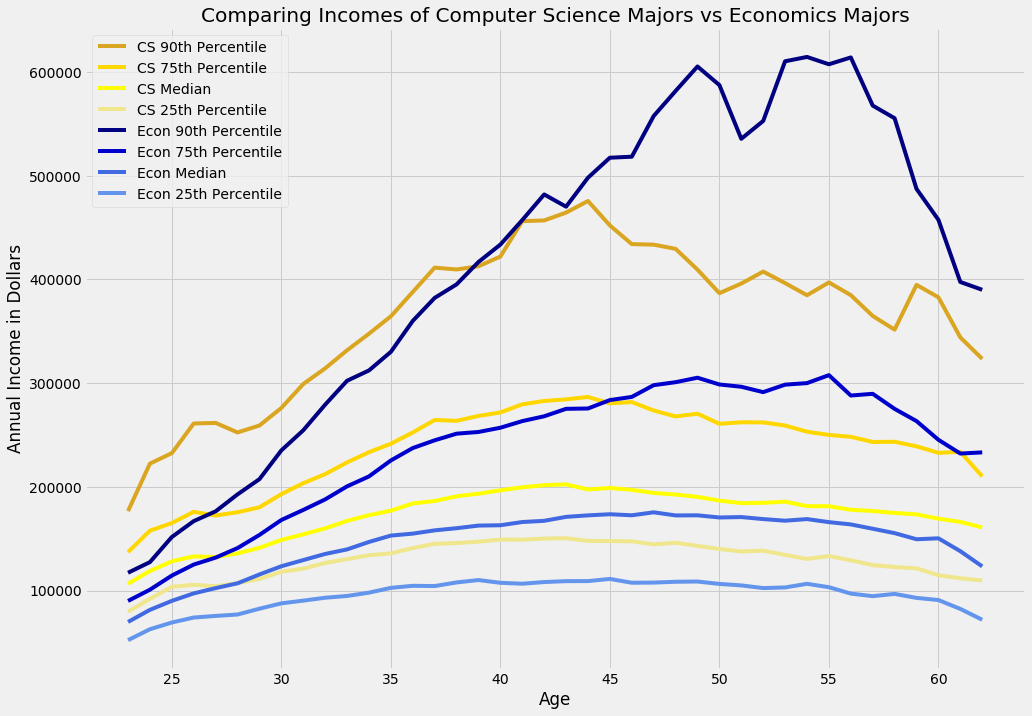

In [10]:
df = cs_vs_econ.to_df()
df.plot("Age",color=["goldenrod","gold","yellow","khaki","navy","mediumblue","royalblue","cornflowerblue"])
plt.ylabel("Annual Income in Dollars")
plt.title("Comparing Incomes of Computer Science Majors vs Economics Majors");
fig = plt.gcf()
fig.set_size_inches(15, 11)

Let's take a look at how the incomes compare at each percentile. The most notable trend is probably the fact that for the most the part, CS majors typically make more money than Econ majors.
We especially observe this trend in the 25th and 50th percentiles, and this follows accordingly with our exploration earlier in the notebook that students who majored in L&S Computer Science on average had a higher median income than pretty much every other major. 

The graph above helps explain why CS is one of the most popular majors here at Berkeley. 
Software engineering and related disciplines have a huge demand for fresh talent, so that individuals entering these fields are duly compensated. This in and of itself is a big appeal of students wanting to major in computer science. 

Right off the bat out of college, fresh CS graduates are looking at a six figure income: even the 25th percentile of CS majors are making over $103,000 by the time they are 25. At any given percentile level, CS graduates outearn their Economics counterparts immediately post-graduation.


### Intertemporal Effects

However, we don't just choose our majors based off of the immediate post-graduation income. Intuitively, we would want to maximize our total lifetime income we make. This idea is called *intertermporal utility maximization*: Economists often take into account one's utility across all possible time periods.

Considering lifetime income, which major would be better? Well, it depends: if you are at the bottom 25th or 50th percentile, CS is better. This suggests that the typical Economics major will likely never outearn the the typical CS major.

However, we observe that Economics majors at higher percentiles ultimately overtake CS majors in earnings. Intuitively, this should make sense. Perhaps top Economics majors are more likely to become successful executives later on in their careers while make more money than top CS majors, who continue to stay as software engineers or become engineering managers. 

### Risk
We observe that Economics majors have a much larger spread in their lifetime earnings than CS majors: top Economics graduates make significantly more than bottom Economics graduates, compared to top CS and bottom CS graduates.

This brings to the light the notion of risk. Majoring in CS carries relatively lower variance: whether you are 
a top notch developer in the 75th percentile or a subpar developer in the 25th percentile, you will probably make a solid living. Since most CS majors typically end up pursuing similar careers in the realms of software development, there is less **variance** in the occupations. There is also less **risk**: most CS majors can expect to land a software engineering job and continue working as one twenty years into their career.

The same story is less true for Economics majors: a top-notch Economics major will significantly out-earn a subpar Economics major. This is partly due to the vastly differing occupation types Economics majors become: analysts, bankers, consultants, just to name a few (Economics is a very versatile degree, afterall). Twenty years down the line, the top Economics majors will have higher ceilings perhaps with a lot of opportunity for leadership or executive positions. There is a lot more **variance** in the types of jobs and thus salaries that Economics majors will attain. In addition, there is a lot more **risk**: not every Economics major will become a top executive, and most end up with more 'average' jobs that earn less than that of similar percentile CS majors.

This means that if you know you are at the top regardless of your major, you will tend to ultimately earn more income as an Economics major than a CS major. But a caveat: it's impossible to guarantee that you will be in the top, no matter how hard you work. Often, life has uncertainties and involves a great deal of luck to become successful.

The table and graph above only considered the percentile incomes of CS and Economics majors, but if you're interested in drawing more comparisons, check out [this page](https://www.universityofcalifornia.edu/infocenter/berkeley-outcomes). You can compare between all types of popular majors at UC Berkeley, and even toggle around with more features like gender, ethnicity, or even specific courses.

## An Afterword

In this demo, we've covered a series of fundamental Economics ideas such as income, utility, and risk. We've also gone over a series of more statistical concepts that are also at the heart of empirical Economics such as causal inference, generalization, and unobserved variables. We did this all using data science techniques and visualizations, while being cognizant of potential sources of error. We will be revisiting a lot of these themes in later parts of the course.

From this exercise you may have noticed that pursuing either Economics, Data Science, or both are great options in terms of post-graduation incomes. This means you've probably chosen wisely to have ended up in this class. 

Welcome to Data 88E! 